Stand: 19.07.25

Ein Beispiel für Tilman - Einbindung der Heatmaps in Dia 3
Die Werte wurden für den Zeitraum vom 10.04 - 14.09.2024 zusammgefasst, weil es dort genügend auswertbare Daten gab (teilweise sind Sensoren länger ausgefallen)

Spaltenerklärung:

- temperature: Mittelwert der Temperatur für die jeweilige Station zur jeweiligen Stunde für den Zeitraum April bis September
- mean_temperature: globaler Temperaturmittelwert aller Stationen zu dieser Stunde -> in allen Reihen steht der gleiche Wert pro Stunde
- temperature_deviation: Differenz der anderen Spalten (temperature - mean_temperature)  -> Zeigt an wieviel kühler oder wärmer die Station im Vergleich ist zur gegebenen Stunde


dia3_stationen_heatmap.csv basiert auf ws_compl_summer.csv -> einem gesäuberten Datenset der Sensorrohdaten


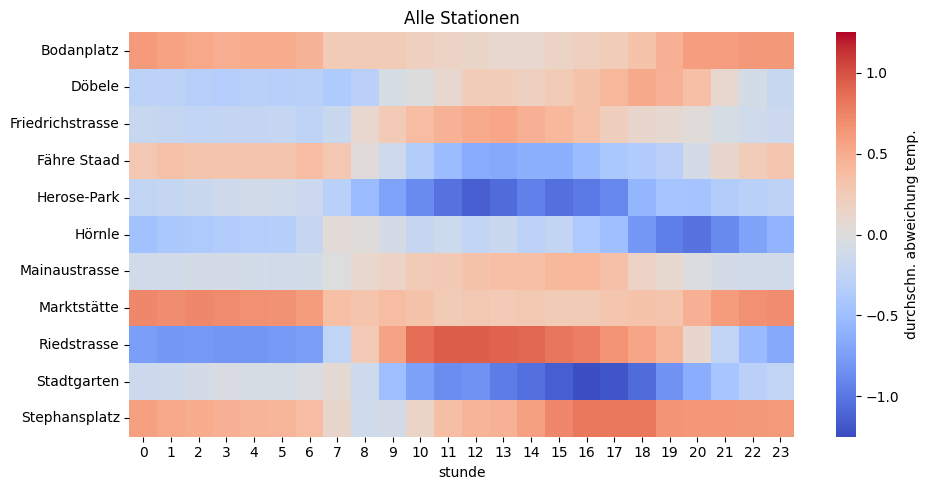

In [3]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


heatmap = pd.read_csv("../dia3_stationen_heatmap.csv")

# Abweichung vom stündlichen, globalen Mittelwert aller Stationen -> Über den Zeitraum 10.04. - 14.09.2024


def round_up_to_step(x, step=0.05):
    return math.copysign(math.ceil(abs(x) / step) * step, x)


# Auf den nächsten höheren Vielfachen von 0.05 runden (absolut aufrunden)
max_temp = round_up_to_step(heatmap["temperature_deviation"].max())  # 0.96 wird zu 1
min_temp = round_up_to_step(
    heatmap["temperature_deviation"].min()
)  # -1.23 wird zu -1.25

# Absolutwert-Vergleich: den größeren Betrag für beide verwenden
abs_max = max(abs(min_temp), abs(max_temp))
max_temp = abs_max
min_temp = -abs_max

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# lcz_heatmap = heatmap[heatmap['name'].isin(lcz_data['name'])]
heatmap_pivot = heatmap.pivot_table(
    index="name", columns="hour", values="temperature_deviation"
)

sns.heatmap(
    heatmap_pivot,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    cbar_kws={"label": "durchschn. abweichung temp."},
    vmin=min_temp,
    vmax=max_temp,
    ax=ax,
)

ax.set_title("Alle Stationen")
ax.set_xlabel("stunde")
plt.tight_layout()
ax.set_ylabel("")
plt.show()

Nur der Sommerzeitraum vom 01.06.2024 bis 31.08.2024:

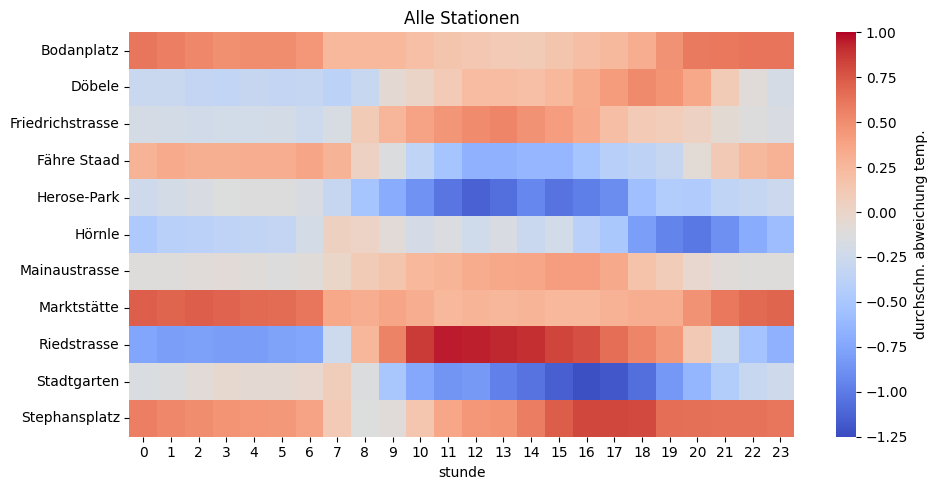

In [3]:
def round_up_to_step(x, step=0.05):
    return math.copysign(math.ceil(abs(x) / step) * step, x)


# Auf den nächsten höheren Vielfachen von 0.05 runden (absolut aufrunden)
max_temp = round_up_to_step(heatmap["temperature_deviation"].max())  # 0.96 wird zu 1
min_temp = round_up_to_step(
    heatmap["temperature_deviation"].min()
)  # -1.23 wird zu -1.25

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# lcz_heatmap = heatmap[heatmap['name'].isin(lcz_data['name'])]
heatmap_pivot = heatmap.pivot_table(
    index="name", columns="hour", values="temperature_deviation"
)

sns.heatmap(
    heatmap_pivot,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    cbar_kws={"label": "durchschn. abweichung temp."},
    vmin=min_temp,
    vmax=max_temp,
    ax=ax,
)

ax.set_title("Alle Stationen")
ax.set_xlabel("stunde")
plt.tight_layout()
ax.set_ylabel("")
plt.show()